## Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading the Data

In [61]:
cd = pd.read_csv('adult.csv')
cd.head (5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [47]:
cd.shape


(32560, 15)

In [49]:
cd.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [53]:
cd.nunique()

39                   73
 State-gov            9
 77516            21647
 Bachelors           16
 13                  16
 Never-married        7
 Adm-clerical        15
 Not-in-family        6
 White                5
 Male                 2
 2174               119
 0                   92
 40                  94
 United-States       42
 <=50K                2
dtype: int64

In [65]:
cd.describe().T
#age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [114]:
cd['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

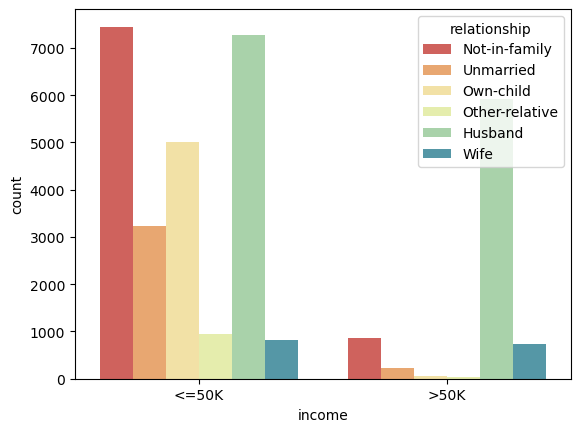

In [101]:
sns.countplot(x='income', palette='Spectral', hue='relationship', data=cd);

## Replacing the "?" values

In [118]:
cd['workclass'] = cd['workclass'].replace('?', 'Private')
cd[ 'occupation'] = cd[ 'occupation' ].replace("?", 'Prof-specialty')
cd[ 'native.country'] = cd[ 'native.country'].replace("?", 'United-States')
cd.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [ ]:
cd.replace('?', pd.NA, inplace=True)
cd.dropna(inplace=True)

## Feature Engineering

In [116]:
cd['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [126]:
cd.education=cd.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'],'No HS Diploma')
cd.education=cd.education.replace(['HS-grad'], 'HS Diploma')
cd.education=cd.education.replace(['Assoc-voc' ,'Assoc-acdm','Prof-school', 'Some-college'], 'Higher Ed')
cd['marital.status']=cd['marital.status'].replace(['Separated','Divorced','Married-spouse-absent'],'Separated')

cd.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS Diploma,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS Diploma,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Higher Ed,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,No HS Diploma,4,Separated,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Higher Ed,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS Diploma,9,Separated,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,No HS Diploma,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS Diploma,9,Separated,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Higher Ed,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [136]:
# Filter the DataFrame to only include numeric columns
numeric_cd = cd.select_dtypes(include=['number'])

# Calculate the correlation matrix
numeric_cd.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


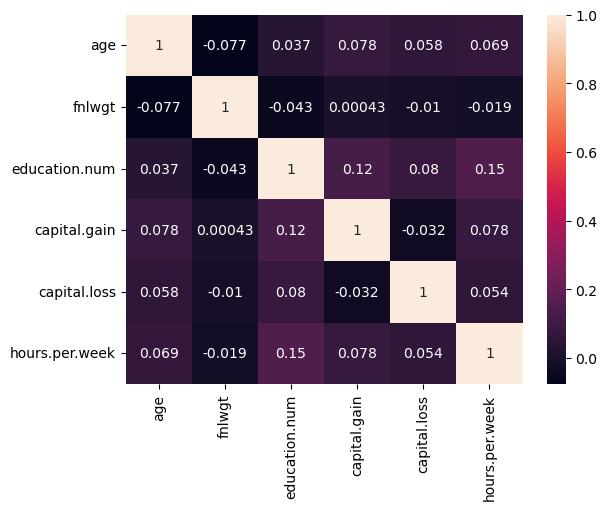

In [138]:
sns.heatmap(numeric_df.corr(),annot=True);

## Histogram

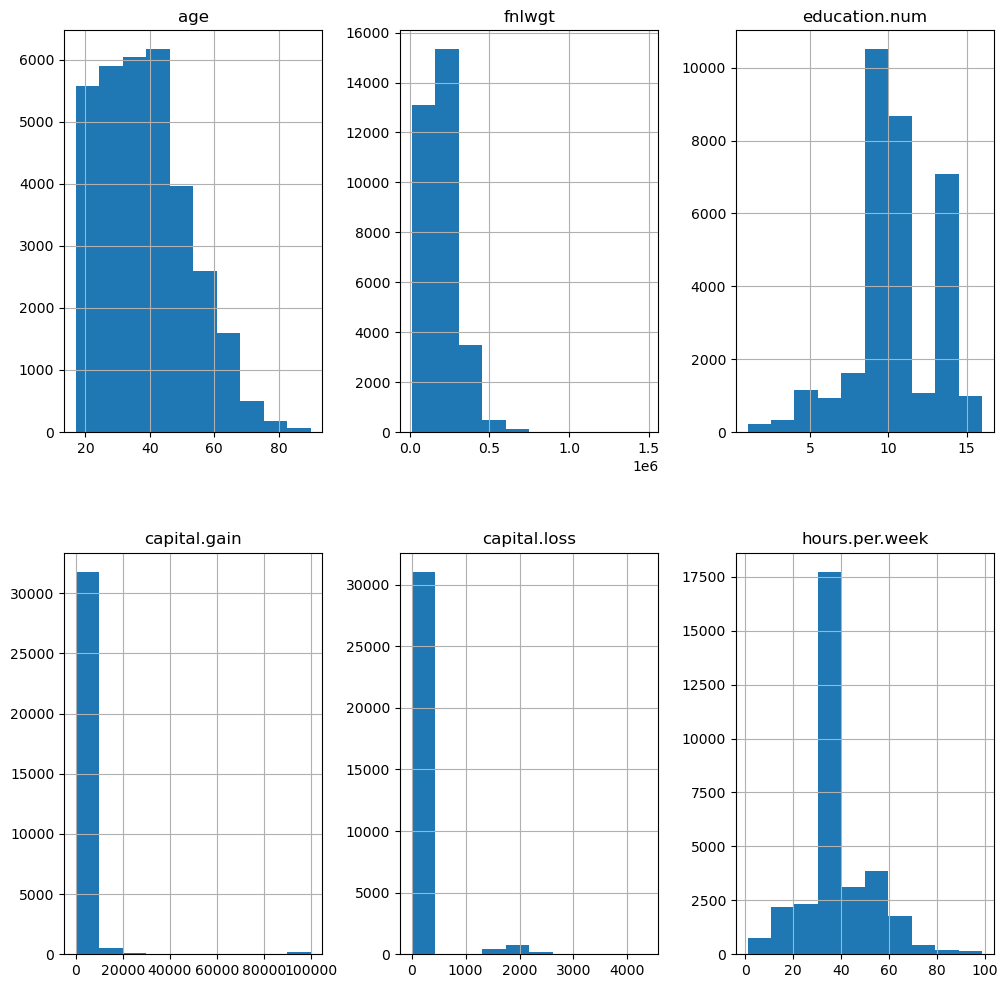

In [163]:
numeric_cd.hist(figsize=(12,12), layout=(2,3), sharex=False);

## Boxplot

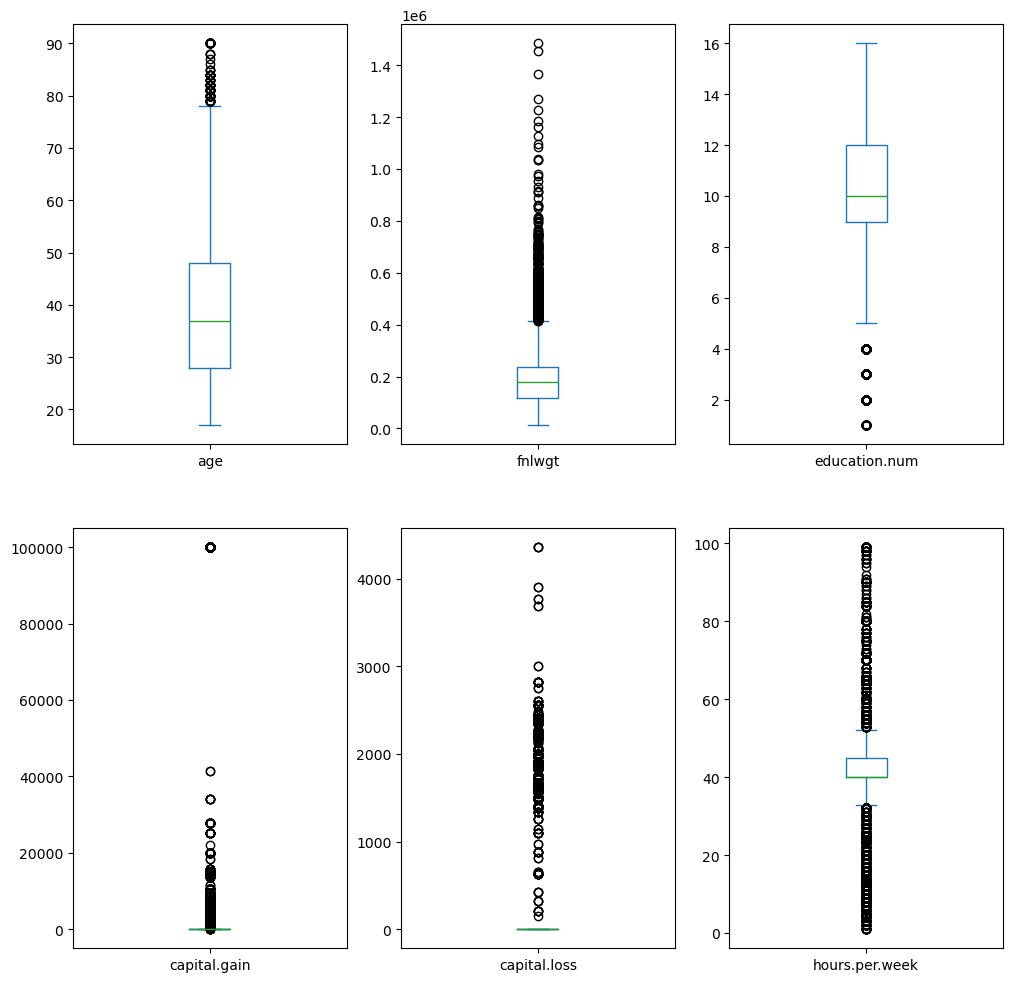

In [166]:
cd.plot(kind='box', figsize=(12,12), layout=(2,3), sharex=False, subplots=True);

## Pie Chart

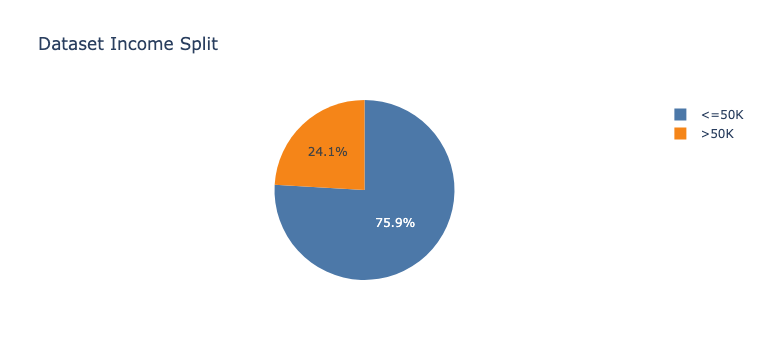

In [175]:
income_counts = cd['income'].value_counts()
px.pie(income_counts, values=income_counts, 
             names=income_counts.index, 
             title='Dataset Income Split',
             color_discrete_sequence=px.colors.qualitative.T10)

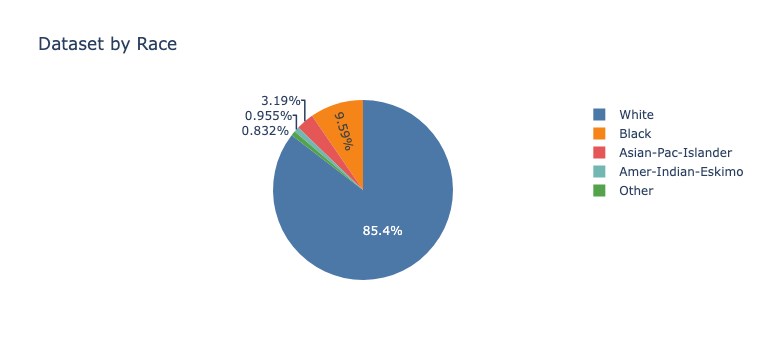

In [177]:
race_counts = cd['race'].value_counts()
px.pie(race_counts, values=race_counts, 
             names=race_counts.index, 
             title='Dataset by Race',
             color_discrete_sequence=px.colors.qualitative.T10)

## Building the Predictive Model

In [ ]:
x = cd.drop(['income'], axis=1)
y = cd['income']

## Scaling the Features

In [206]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [197]:
cd2 = cd.copy()
cd2 = cd2.apply(LabelEncoder().fit_transform)
cd2.head(8)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2649,2,8,4,9,1,4,0,0,91,39,38,0
1,65,3,6514,2,8,4,3,1,4,0,0,91,17,38,0
2,49,3,11175,3,9,4,9,4,2,0,0,91,39,38,0
3,37,3,7009,5,3,3,6,4,4,0,0,90,39,38,0
4,24,3,16850,3,9,3,9,3,4,0,0,90,39,38,0
5,17,3,14182,2,8,3,7,4,4,0,0,89,44,38,0
6,21,3,7800,5,5,3,0,4,4,1,0,89,39,38,0
7,57,6,3183,1,15,2,9,2,4,0,0,88,19,38,1


In [199]:
sScaler = StandardScaler().fit(cd2.drop('income', axis=1))
x = sScaler.transform(cd2.drop('income', axis=1))
y = cd['income']

## Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
lr = LogisticRegression()
model = lr.fit(x_train, y_train)
lrPrediction = model.predict(x_test)
print("Training Data Accuracy: {:,.5f}".format(lr.score(x_train, y_train)))
print("Test Data Accuracy: {:,.5f}".format(lr.score(x_test, y_test)))

Training Data Accuracy: 0.83788
Test Data Accuracy: 0.83601


## Random Forest Classifier

In [240]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfcModel = rfc.fit(x_train, y_train)
rfcPrediction = rfcModel.predict(x_test)
print("Training Data Accuracy: {:,.5f}".format(rfc.score(x_train, y_train)))
print("Test Data Accuracy: {:,.5f}".format(rfc.score(x_test, y_test)))

Training Data Accuracy: 1.00000
Test Data Accuracy: 0.85505


## Data Accuracy Report

In [227]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [232]:
print(confusion_matrix(y_test, rfcPrediction))

[[6888  518]
 [ 872 1491]]


In [234]:
print(classification_report(y_test, rfcPrediction))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7406
        >50K       0.74      0.63      0.68      2363

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769



In [246]:
print(confusion_matrix(y_test, lrPrediction))

[[6936  470]
 [1132 1231]]


In [248]:
print(classification_report(y_test, lrPrediction))

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90      7406
        >50K       0.72      0.52      0.61      2363

    accuracy                           0.84      9769
   macro avg       0.79      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769

